In [1]:
%%html
<marquee style='width: 30%; color: yellow;'><b>KNN-to-Predict-Font-Labels</b></marquee>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preliminary treatment of the data set


In [ ]:
df_bodoni=pd.read_csv('/content/drive/MyDrive/KNN_font/BODONI.csv',delimiter=',')
df_eras=pd.read_csv('/content/drive/MyDrive/KNN_font/ERAS.csv',delimiter=',')
df_gabriola=pd.read_csv('/content/drive/MyDrive/KNN_font/GABRIOLA.csv',delimiter=',')
df_technic=pd.read_csv('/content/drive/MyDrive/KNN_font/TECHNIC.csv',delimiter=',')

In [ ]:
print(df_bodoni.shape,df_eras.shape,df_gabriola.shape,df_technic.shape)

In [ ]:
df_bodoni

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,h,w,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,BODONI,BODONI MT POSTER COMPRESSED,64258,0.4,0,0.0,33,20,49,20,20,20,1,1,1,1,1,47,47,151,209,105,105,105,255,255,255,255,255,255,1,1,1,1,1,1,94,255,255,58,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
1,BODONI,BODONI MT POSTER COMPRESSED,64257,0.4,0,0.0,33,20,49,20,20,20,1,1,1,1,1,1,47,151,151,209,105,105,105,105,105,151,151,47,1,1,1,1,1,1,94,198,255,162,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
2,BODONI,BODONI MT POSTER COMPRESSED,9674,0.4,0,0.0,33,22,49,29,20,20,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1
3,BODONI,BODONI MT POSTER COMPRESSED,8805,0.4,0,0.0,40,24,33,25,20,20,255,194,101,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,255,255,212,171,47,19,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,BODONI,BODONI MT POSTER COMPRESSED,8804,0.4,0,0.0,40,24,33,25,20,20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21,101,194,255,1,1,1,1,1,1,1,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,BODONI,BODONI MT,37,0.7,1,0.0,36,30,48,46,20,20,1,1,36,154,246,213,247,131,12,1,1,1,1,1,1,1,2,126,255,172,1,87,244,255,163,1,233,255,...,9,160,255,132,1,1,1,1,1,1,1,104,255,233,1,163,255,217,87,1,172,255,126,2,1,1,1,1,1,1,1,12,131,247,213,246,154,17,1,1
3960,BODONI,BODONI MT,36,0.7,1,0.0,36,22,53,33,20,20,1,1,1,1,1,1,1,1,1,1,62,255,31,1,1,217,93,1,1,1,1,1,1,1,1,1,10,41,...,1,1,1,1,39,255,16,1,1,232,78,1,1,1,1,1,1,1,1,1,1,1,1,1,156,151,4,1,100,191,19,1,1,1,1,1,1,1,1,1
3961,BODONI,BODONI MT,35,0.7,1,0.0,36,25,46,40,20,20,1,1,1,1,1,1,145,255,255,111,1,1,1,1,1,200,255,255,111,1,1,1,1,1,1,1,255,255,...,1,1,255,255,255,1,1,1,1,1,1,255,255,255,1,1,1,1,1,1,1,111,255,255,145,1,1,1,1,1,111,255,255,145,1,1,1,1,1,1
3962,BODONI,BODONI MT,34,0.7,1,0.0,36,32,22,25,20,20,1,1,14,24,255,255,255,70,1,1,1,1,1,10,24,209,255,255,116,5,1,19,172,255,255,255,255,255,...,255,255,103,1,1,1,1,1,1,1,1,205,255,154,1,1,1,1,1,1,255,163,10,1,1,1,1,1,1,1,1,205,209,14,1,1,1,1,1,1


KEEP the 3 columns {font, strength, italic}
KEEP also the 400 columns named r0c0, r0c1,r0c2, ... , r19c18, r19c19 any row containing missing numerical data should be be discarded

In [ ]:
#KEEP the 3 columns {font, strength, italic}
df_CL1 = df_bodoni.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL2 = df_eras.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL3 = df_gabriola.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()
df_CL4 = df_technic.iloc[:, [0]+ [3] + [4] + list(np.arange(12,412))].dropna()

Missing numerical data has been discarded, then check the data shape and data types

In [ ]:
print(df_CL1.shape,df_CL2.shape,df_CL3.shape,df_CL4.shape)

(3964, 403) (3904, 403) (3512, 403) (5520, 403)


In [ ]:
print(df_CL1.dtypes,df_CL2.dtypes,df_CL3.dtypes,df_CL4.dtypes)

font         object
strength    float64
italic        int64
r0c0          int64
r0c1          int64
             ...   
r19c15        int64
r19c16        int64
r19c17        int64
r19c18        int64
r19c19        int64
Length: 403, dtype: object font         object
strength    float64
italic        int64
r0c0          int64
r0c1          int64
             ...   
r19c15        int64
r19c16        int64
r19c17        int64
r19c18        int64
r19c19        int64
Length: 403, dtype: object font         object
strength    float64
italic        int64
r0c0          int64
r0c1          int64
             ...   
r19c15        int64
r19c16        int64
r19c17        int64
r19c18        int64
r19c19        int64
Length: 403, dtype: object font         object
strength    float64
italic        int64
r0c0          int64
r0c1          int64
             ...   
r19c15        int64
r19c16        int64
r19c17        int64
r19c18        int64
r19c19        int64
Length: 403, dtype: object


Define then four CLASSES CL1 CL2 CL3 CL4 of images of "normal" characters as follows CLj = all rows of FONTj.csv for which {strength = 0.4 and italic=0}

In [ ]:
#the "normal" character data frames are denoted by _n
df_CL1_n = df_CL1[(df_CL1['strength']==0.4) & (df_CL1['italic']==0)].drop(columns=['font','strength','italic'])
df_CL2_n = df_CL2[(df_CL2['strength']==0.4) & (df_CL2['italic']==0)].drop(columns=['font','strength','italic'])
df_CL3_n = df_CL3[(df_CL3['strength']==0.4) & (df_CL3['italic']==0)].drop(columns=['font','strength','italic'])
df_CL4_n = df_CL4[(df_CL4['strength']==0.4) & (df_CL4['italic']==0)].drop(columns=['font','strength','italic'])

In [ ]:
df_CL1_n.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,47,47,151,209,105,105,105,255,255,255,255,255,255,1,1,1,1,1,1,94,255,255,58,1,1,1,198,255,255,255,255,255,255,1,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
1,1,1,1,1,1,1,47,151,151,209,105,105,105,105,105,151,151,47,1,1,1,1,1,1,94,198,255,162,58,1,1,1,1,94,198,255,255,255,198,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
2,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1
3,255,194,101,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,255,255,212,171,47,19,1,1,1,1,1,1,1,1,1,1,1,1,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21,101,194,255,1,1,1,1,1,1,1,1,1,1,1,1,1,19,47,171,212,255,255,218,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
df_CL2_n.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,24,145,145,240,255,255,255,255,240,145,42,42,145,145,145,145,1,1,1,77,233,255,255,255,255,208,189,189,189,217,73,73,255,255,255,255,...,1,1,219,255,255,255,110,1,1,1,1,1,1,1,1,255,255,255,255,73,1,1,219,255,255,255,110,1,1,1,1,1,1,1,1,255,255,255,255,73
1,1,1,1,1,24,145,145,240,255,255,255,255,240,145,42,42,145,145,145,145,1,1,1,77,233,255,255,255,255,208,189,189,189,217,73,73,255,255,255,255,...,1,1,219,255,255,255,110,1,1,1,1,1,1,1,1,255,255,255,255,73,1,1,219,255,255,255,110,1,1,1,1,1,1,1,1,255,255,255,255,73
2,1,1,1,1,1,1,1,1,1,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,85,247,247,85,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,85,247,247,85,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,100,1,1,1,1,1,1,1,1,1
3,212,114,86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,255,255,249,227,105,44,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,86,114,212,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44,105,227,249,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
df_CL3_n.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,1,1,1,1,2,89,127,141,113,198,222,60,1,1,1,1,1,1,1,1,1,1,1,21,173,142,1,1,1,34,236,146,1,1,1,...,245,115,1,1,49,176,105,1,1,1,1,1,1,1,1,1,1,1,1,1,131,172,208,168,160,35,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,92,138,171,203,86,59,171,171,203,229,184,1,1,1,1,1,1,1,1,144,118,1,1,118,255,184,1,1,20,255,118,1,...,151,14,1,14,184,138,125,1,1,99,99,1,1,1,1,1,1,1,1,1,223,249,171,171,72,72,210,255,210,72,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,66,136,171,204,127,57,161,144,131,234,111,1,1,1,1,1,1,1,1,107,159,2,1,61,255,232,21,1,1,191,211,1,...,152,16,1,7,169,146,142,6,1,84,151,1,1,1,1,1,1,1,1,1,222,252,171,171,87,21,171,251,191,104,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,3,119,168,168,168,213,229,255,106,1,1,1,1,1,1,1,1,1,1,49,214,133,9,1,1,54,255,229,1,1,...,247,133,9,1,21,115,185,34,1,1,1,1,1,1,1,1,1,1,1,1,128,172,199,181,169,93,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,3,117,124,141,106,186,242,110,1,1,1,1,1,1,1,1,1,1,1,49,214,100,1,1,1,54,255,229,1,1,...,247,133,9,1,21,115,185,34,1,1,1,1,1,1,1,1,1,1,1,1,128,172,199,181,169,93,2,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_CL4_n.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,108,255,255,241,87,1,1,1,145,255,255,226,65,1,1,1,1,1,1,1,183,255,255,255,146,1,1,1,219,255,255,255,110,1,1,1,...,1,1,1,1,1,1,1,1,1,183,255,110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,183,255,110,1,1,1,1,1,1,1,1
1,255,255,103,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,255,255,103,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,255,255,103,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,255,255,103,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,36,77,201,255,183,1,1,1,1,1,1,1,1,1,1,1,5,71,126,222,241,217,130,62,25,1,1,1,1,...,1,1,1,1,1,1,1,1,1,183,255,110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,183,255,110,1,1,1,1,1,1,1,1
3,1,1,1,156,255,255,247,105,1,1,1,1,105,247,255,255,156,1,1,1,1,1,1,236,255,255,255,177,1,1,1,1,177,255,255,255,236,1,1,1,...,1,1,65,199,255,198,154,58,58,58,58,58,58,154,198,255,251,166,44,1,1,1,1,8,87,151,159,255,255,255,255,255,255,159,151,87,44,1,1,1
4,1,1,1,1,1,1,1,16,106,154,232,106,16,1,1,1,1,1,1,1,1,1,1,1,1,63,110,220,255,177,177,255,220,189,63,1,1,1,1,1,...,1,1,71,205,255,193,146,52,52,52,52,52,52,146,193,255,252,173,48,1,1,1,1,8,91,154,161,255,255,255,255,255,255,161,154,91,48,1,1,1


In [ ]:
#check "normal" data shapes and balance
print(df_CL1_n.shape,df_CL2_n.shape,df_CL3_n.shape,df_CL4_n.shape)


(991, 400) (976, 400) (878, 400) (1380, 400)


The four fonts cases are 991, 976, 878 and 1380. The CL4 is about 35% larger than other 3 classes. To make the data more balancing, CL4 cases are decreased to 980. 

In [ ]:
df_CL4_n=df_CL4_n.iloc[0:980,:]
df_CL4_n.shape

(980, 400)

In [ ]:
# Display their respective sizes N1, N2, N3,N4, and the total number of cases N= n1 +n2 +n3 +n4
n1 = len(df_CL1_n)
n2 = len(df_CL2_n)
n3 = len(df_CL3_n)
n4 = len(df_CL4_n)
N = n1 + n2+ n3 + n4
print("Size N1 of CL1(bodoni) is:\t", n1)
print("Size N2 of CL2(eras) is:\t", n2)
print("Size N3 of CL3(gabriola) is:\t", n3)
print("Size N4 of CL4(technic) is:\t", n4)
print("Totoal number of cases is:\t", N)

Size N1 of CL1(bodoni) is:	 991
Size N2 of CL2(eras) is:	 976
Size N3 of CL3(gabriola) is:	 878
Size N4 of CL4(technic) is:	 980
Totoal number of cases is:	 3825


**The full data set (denoted DATA ) for the next questions will be the union of the four classes CL1 , CL2, CL3,CL4 and hence regroups**\
\
Case # n in DATA corresponds to a specific row "i" in the matrix DATA , and will be described by a vector of 400 feature values , namely the 400 numbers listed in row "i" of DATA\
\
The 400 feature values X1(i) ...X400(i) for Case # i correspond to the 400 columns X1 = r0c0, X2 = r0c1, X3 = r0c2, ... , X399 = r19c18, X400 = r19c19
Each such feature Xj is observed N times, and its N observed values Xj(n) are listed in the column "j" of DATA.\
\

In [ ]:
DATA = pd.concat([df_CL1_n, df_CL2_n, df_CL3_n, df_CL4_n], ignore_index=True)
DATA

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,47,47,151,209,105,105,105,255,255,255,255,255,255,1,1,1,1,1,1,94,255,255,58,1,1,1,198,255,255,255,255,255,255,1,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
1,1,1,1,1,1,1,47,151,151,209,105,105,105,105,105,151,151,47,1,1,1,1,1,1,94,198,255,162,58,1,1,1,1,94,198,255,255,255,198,1,...,1,1,255,255,255,255,255,255,1,1,1,1,255,255,255,255,255,255,1,1,105,105,255,255,255,255,255,255,105,1,1,105,255,255,255,255,255,255,105,105
2,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,146,255,255,146,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,119,119,2,1,1,1,1,1,1,1,1
3,255,194,101,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,255,255,212,171,47,19,1,1,1,1,1,1,1,1,1,1,1,1,1,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21,101,194,255,1,1,1,1,1,1,1,1,1,1,1,1,1,19,47,171,212,255,255,218,...,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3820,1,1,1,1,1,171,255,200,144,88,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,53,108,164,247,253,255,203,148,31,1,1,1,1,1,1,...,255,255,197,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3821,1,1,1,1,1,77,144,166,244,255,255,255,255,233,166,132,20,1,1,1,1,1,1,78,209,255,248,193,115,103,103,103,103,182,232,255,234,108,8,1,...,1,1,1,1,1,1,13,103,103,103,103,122,255,252,91,1,1,1,1,1,1,1,1,1,1,1,10,121,188,255,255,255,211,125,1,1,1,1,1,1
3822,1,1,1,1,1,1,134,255,255,255,255,255,255,255,255,255,255,255,255,47,1,1,1,1,1,1,224,212,190,255,230,189,189,189,189,189,189,189,189,35,...,151,255,11,1,1,1,1,1,6,255,230,189,189,189,189,189,189,189,189,189,242,174,2,1,1,1,1,1,6,255,255,255,255,255,255,255,255,255,255,255
3823,1,1,1,1,1,1,14,139,220,255,255,175,63,1,1,1,1,1,1,1,1,1,1,1,1,1,130,238,81,1,1,153,224,27,1,1,1,1,1,1,...,166,255,162,1,1,1,1,1,1,1,1,1,1,1,1,1,14,193,255,166,211,220,18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,18,220,211


#**Part1**#

**1.1 Consider the feature X210. Compute its 4 means A1 A2 A3 A4 in the 4 classes CL1 CL2 CL3 CL4. Are they significantly different? Use a t-test to quantify this evaluation.\
\
Compute and display the 4 histograms H1 H2 H3 H4 of feature X210 in the 4 classes CL1 CL2 CL3 CL4 . Are they significantly different? Use a Kolmogorov-Smirnov KS-test to quantify this evaluation. Interpret these results to roughly evaluate the power of X210 to discriminate between classes CL1 CL2 CL3 CL4**

In [ ]:
#Compute its 4 means A1 A2 A3 A4 in the 4 classes CL1 CL2 CL3 CL4.
A1 = df_CL1_n.iloc[:,210].mean()
A2 = df_CL2_n.iloc[:,210].mean()
A3 = df_CL3_n.iloc[:,210].mean()
A4 = df_CL4_n.iloc[:,210].mean()
print('Mean of X210 in CL1 (bodoni data set) is:', format(A1,'.2f'))
print('Mean of X210 in CL2 (eras data set) is:', format(A2,'.2f'))
print('Mean of X210 in CL3 (gabriola data set) is:', format(A3,'.2f'))
print('Mean of X210 in CL4 (technic data set) is:', format(A4,'.2f'))

Mean of X210 in CL1 (bodoni data set) is: 123.37
Mean of X210 in CL2 (eras data set) is: 119.19
Mean of X210 in CL3 (gabriola data set) is: 74.19
Mean of X210 in CL4 (technic data set) is: 84.39


**Comment:**
\
With the result for mean above, we can tell that they are signigicantly different witht the highest mean is 123.37 which belongs to CL1 - Bodoni Font and the lowest mean is 74.19 which is belong to CL3 - Gabriola Font. The mean between CL3 and CL4 (Gabriola and Techinic Font) are similar (74.19 and 83.39)\
\
The mean of CL1 and CL2 are also look similar that suggests the similar distribution.\
\
We will look at the histograms to see better.

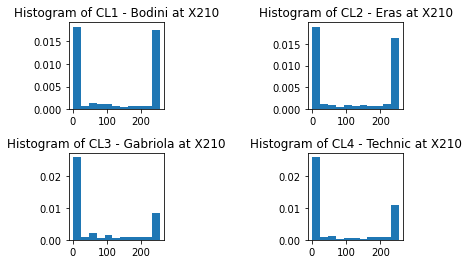

In [ ]:
# Histogram of H1, H2, H3, and H4
import matplotlib.pyplot as plt
plt.subplot(221)
plt.hist(df_CL1_n.iloc[:,210], bins="auto",density = True)
plt.title('Histogram of CL1 - Bodini at X210')
plt.subplot(222)
plt.hist(df_CL2_n.iloc[:,210], bins="auto",density = True)
plt.title('Histogram of CL2 - Eras at X210')
plt.subplot(223)
plt.hist(df_CL3_n.iloc[:,210], bins="auto",density = True)
plt.title('Histogram of CL3 - Gabriola at X210')
plt.subplot(224)
plt.hist(df_CL4_n.iloc[:,210], bins="auto",density = True)
plt.title('Histogram of CL4 - Technic at X210')

plt.subplots_adjust(wspace=1.5 , hspace=0.5)
plt.show()

**Comment:**
\
From the distogram, we can one more time see that there are similar distributions between CL1 and CL2, CL3 and CL4. The most different distribution is CL1 and CL3 which is exactly what the mean results suggest.\
\
We now will use the KS- Test to reassure the observation.

In [ ]:
#Kolmogorov-Smirnov KS-test for CL1 (Bodoni) and CL3 (Gabriola)
from scipy.stats import ks_2samp
ks_2samp(df_CL1_n.iloc[:,210],df_CL3_n.iloc[:,210])

Ks_2sampResult(statistic=0.21462639840569683, pvalue=4.7225712641039e-19)

**Comment:**
\
From the output we can see that the test statistic is 0.2146 and the corresponding p-value is 4.72e-19. Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that two data sets (Bodoni and Gabriola) has different distributions. This indicates that our observations from the means and the histograms are correct.\
\
Now, we will use the same KS-test for CL1 and CL2, CL3 and CL4 to check if it is true that these two data sets are not significantly different.

In [ ]:
#Kolmogorov-Smirnov KS-test for CL1 (Bodoni) and CL2 (Eras)
ks_2samp(df_CL1_n.iloc[:,210],df_CL2_n.iloc[:,210])

Ks_2sampResult(statistic=0.036273179930853085, pvalue=0.5200864685582496)

**Comment:**
\
From the output we can see that the test statistic is 0.0363 and the corresponding p-value is 0.52. Since the p-value is greater than .05, we conclude the null hypothesis. We have sufficient evidence to say that two data sets (Bodoni and Eras) has similar distributions. This indicates that our observations from the means and the histograms are correct.

####**1.2. Compute the 400x400 correlation matrix CORR of the 400 original features X1 ...X400**####
Identify the 10 pairs Xi,Xj of features which have the 10 highest absolute values |CORR(i,j)|;display these 10 top highest correlation values ; identify the pixel positions corresponding to each such pair Xi and Xj
recall that gray level of pixel pix(6,13) for case #n can be read in row n of column r6c13 of DATA explain how the correlation between the gray levels of pix(6,13) and pix(7,13) can be read from the correlation matrix CORR
compare to the correlations between pix(6,1) and pix(6,18) ; interpretation?


In [ ]:
cor_matrix = DATA.corr()
cor_matrix

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
r0c0,1.000000,0.874081,0.713475,0.592316,0.496225,0.403934,0.306358,0.211826,0.149314,0.117085,0.114827,0.122273,0.122200,0.162174,0.214620,0.265848,0.326787,0.397124,0.467284,0.505856,0.816496,0.701835,0.583240,0.442633,0.260392,0.147947,0.078092,0.017298,-0.011826,-0.006103,0.004842,-0.014376,-0.033966,-0.019456,0.021778,0.087659,0.222844,0.333107,0.401941,0.454831,...,0.360589,0.255536,0.196857,0.118847,0.001492,-0.019729,0.004022,0.015723,0.040820,0.073478,0.072160,0.048781,0.012459,-0.012142,-0.033853,0.007457,0.121046,0.222913,0.284987,0.425248,0.368785,0.350748,0.323120,0.273083,0.235748,0.193972,0.154021,0.101978,0.083601,0.102125,0.098798,0.091613,0.119703,0.161802,0.186034,0.204375,0.234918,0.282292,0.351786,0.453751
r0c1,0.874081,1.000000,0.886281,0.723311,0.591866,0.454841,0.310045,0.183795,0.100679,0.065817,0.067882,0.078480,0.087358,0.144902,0.226441,0.291235,0.363497,0.440451,0.489932,0.472749,0.759182,0.822823,0.726501,0.553483,0.349424,0.194426,0.083068,-0.011388,-0.058251,-0.052873,-0.044680,-0.061305,-0.069903,-0.026999,0.032188,0.112528,0.264744,0.381291,0.427126,0.429932,...,0.373699,0.289516,0.223233,0.132094,-0.008176,-0.042167,-0.027282,-0.018023,0.022799,0.058403,0.055175,0.035097,-0.004441,-0.030098,-0.046474,0.004682,0.132308,0.240806,0.291280,0.365814,0.368483,0.383764,0.351988,0.285995,0.222343,0.162458,0.108080,0.047992,0.035721,0.058924,0.059550,0.048915,0.073814,0.119542,0.158024,0.187489,0.237986,0.305494,0.358682,0.381332
r0c2,0.713475,0.886281,1.000000,0.890534,0.731381,0.569234,0.390944,0.236942,0.127416,0.073338,0.065317,0.074986,0.096200,0.172143,0.276773,0.353266,0.423300,0.478173,0.463353,0.423813,0.608774,0.718205,0.792257,0.691186,0.482908,0.309088,0.178585,0.051537,-0.033739,-0.052035,-0.063469,-0.072460,-0.052941,0.014042,0.093658,0.183933,0.321712,0.404229,0.393651,0.373681,...,0.337662,0.270526,0.261839,0.184936,0.042441,-0.002265,0.005238,0.012884,0.038540,0.054001,0.042042,0.035143,0.013410,0.002451,-0.009430,0.050292,0.172199,0.257230,0.268086,0.310819,0.353918,0.372609,0.397089,0.345744,0.270822,0.203205,0.139844,0.073907,0.047469,0.051687,0.049169,0.049380,0.082842,0.141826,0.193179,0.226166,0.278769,0.327932,0.326501,0.323424
r0c3,0.592316,0.723311,0.890534,1.000000,0.890874,0.710086,0.507987,0.320958,0.179995,0.101965,0.081187,0.090524,0.116375,0.205684,0.324929,0.412080,0.467752,0.450812,0.405723,0.385751,0.495019,0.597575,0.734211,0.786167,0.632182,0.440204,0.295920,0.132662,0.017481,-0.021842,-0.044207,-0.046551,-0.008785,0.078219,0.169696,0.262600,0.365574,0.388149,0.349757,0.332836,...,0.303925,0.239418,0.262330,0.227867,0.095091,0.038665,0.036856,0.041251,0.056453,0.061010,0.057183,0.061956,0.058038,0.058221,0.046385,0.108530,0.200181,0.231336,0.215866,0.259129,0.328375,0.331887,0.384216,0.377460,0.310858,0.243086,0.173868,0.107025,0.070520,0.057032,0.056648,0.066778,0.110206,0.178613,0.236154,0.271313,0.301673,0.284768,0.252884,0.259776
r0c4,0.496225,0.591866,0.731381,0.890874,1.000000,0.868022,0.650918,0.428993,0.241558,0.126333,0.089406,0.112011,0.158733,0.251654,0.374678,0.447870,0.446516,0.401397,0.360374,0.349340,0.435290,0.515514,0.650818,0.754702,0.737640,0.568518,0.417112,0.233406,0.086753,0.012196,-0.023934,-0.013390,0.046350,0.134515,0.230594,0.311344,0.380415,0.373695,0.329472,0.317408,...,0.298478,0.228515,0.245436,0.237579,0.144879,0.087553,0.073400,0.069967,0.065656,0.059774,0.069854,0.088605,0.102421,0.107014,0.094838,0.143346,0.196289,0.207686,0.189936,0.245870,0.294816,0.2868

**Display these 10 top highest correlation values**

In [ ]:
c = cor_matrix.abs()
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = DATA.columns
    for i in range(0, DATA.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(DATA, n=5):
    au_corr = DATA.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(DATA)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top 10 Absolute Correlations")
print(get_top_abs_correlations(DATA, 10))

Top 10 Absolute Correlations
r12c1   r13c1     0.942461
r9c1    r10c1     0.940795
r9c18   r10c18    0.934590
r10c0   r11c0     0.932689
r13c1   r14c1     0.932245
r9c0    r10c0     0.932068
r10c1   r11c1     0.925408
r13c18  r14c18    0.925110
r12c18  r13c18    0.924162
r11c0   r12c0     0.923794
dtype: float64


In [ ]:
#pix(6,13) and pix(7,13) correlation
cor_1 = DATA['r6c13'].corr(DATA['r7c13'])
cor_1

0.8402242755655094

In [ ]:
#pix(6,1) and pix(6,18) correlation
cor_2 = DATA['r6c1'].corr(DATA['r6c18'])
cor_2

0.5516142484584335

**Comment:**
\
This is a positive correlation (as the pixel at row 6 column 1 increases, the pixel at row 6 column 18 will also increase), but it is not strong as the correlation between r6c13 and r7c13. I think the reason is even at the same case #n, one is at column 1 and one is at column 18, this is a far distance so the relationship between them are not strong. 

####1.3. Compute m1 = mean(X1) .... m400 =mean(X400) and standard deviations s1 = std(X1) ....s400 = std(X400)####
Standardize the features matrix DATA by centering/rescaling each feature Xj to create a new feature
Yj= (Xj - mj) /sj;
the matrix DATA becomes a matrix of rescaled data SDATA, with coefficients given by SDATA(n,j) = (DATA(n,j) - mj )/sj;
Case # n is originally described by [X1(n)...X400(n)] = row "n" of DATA .

In [ ]:
# Compute m1 = mean(X1) .... m400 =mean(X400) from the combine DATA set
m = DATA.mean(axis = 0)
m

r0c0       53.441830
r0c1       69.259346
r0c2       76.520523
r0c3       84.588758
r0c4       94.464052
             ...    
r19c15    105.128627
r19c16     97.843399
r19c17     90.270588
r19c18     82.036863
r19c19     59.009673
Length: 400, dtype: float64

In [ ]:
# Compute standard deviations s1 = std(X1) ....s400 = std(X400) from the combine DATA set
s = DATA.std(axis = 0)
s

r0c0       92.520697
r0c1      101.580590
r0c2      106.162942
r0c3      109.995906
r0c4      112.075925
             ...    
r19c15    112.233768
r19c16    113.502522
r19c17    109.758261
r19c18    106.650146
r19c19     95.365508
Length: 400, dtype: float64

In [ ]:
#generate mean value of CLj
m1=df_CL1_n.mean();
m2=df_CL2_n.mean();
m3=df_CL3_n.mean();
m4=df_CL4_n.mean();
#generate std of CLj
s1=df_CL1_n.std();
s2=df_CL2_n.std();
s3=df_CL3_n.std();
s4=df_CL4_n.std()

In [ ]:
#standardize CLj 
df_S_CL1=(df_CL1_n-m1)/s1;
df_S_CL2=(df_CL2_n-m1)/s2;
df_S_CL3=(df_CL3_n-m1)/s3;
df_S_CL4=(df_CL4_n-m1)/s4

In [ ]:
df_S_CL1.head(3)

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-0.610049,-0.758200,0.128983,0.640353,-0.321730,-0.280469,-0.243842,1.216254,1.292968,1.431909,1.487838,1.564524,1.726304,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,1.021922,1.020809,-0.676768,-1.111295,-1.060211,-1.024762,0.614950,1.123212,1.115572,1.138957,1.205469,1.334032,1.538525,-0.633548,-0.488957,...,-0.503383,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304
1,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-0.758200,0.128983,0.092772,0.645732,-0.280469,-0.243842,-0.177971,-0.128333,-0.022106,0.506923,0.587405,-0.283748,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,0.523164,1.020809,0.249901,-0.615331,-1.060211,-1.024762,-1.094941,-1.134045,-0.304898,0.635539,1.205469,1.334032,1.538525,1.323379,-0.488957,...,-0.503383,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304
2,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-1.182857,-1.259584,-1.313946,-0.191495,-0.152838,-1.193756,-1.144634,-1.113768,-1.030223,-0.907858,-0.821901,-0.728279,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-1.112208,-1.200616,-1.251513,-1.184654,0.150369,1.106328,1.118171,0.163608,-1.134045,-1.125418,-1.104342,-1.057659,-0.967570,-0.820580,-0.633548,-0.488957,...,-0.503383,-0.676541,-0.919525,-1.191154,-1.269546,-1.264991,-1.219330,-1.074728,0.318805,1.300962,1.310483,0.295461,-1.079421,-1.181449,-1.196483,-1.210831,-1.159273,-0.902096,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-1.026485,-1.095925,-1.265614,-1.383690,-1.403930,-1.391034,-0.173624,-0.148455,-1.389943,-1.396210,-1.394769,-1.261693,-1.076737,-0.950835,-0.853059,-0.753454,-0.668891


In [ ]:
#generate SDATA=(DATA-mj)/sj (just combine standardized CLj)
SDATA= pd.concat([df_S_CL1,df_S_CL2,df_S_CL3,df_S_CL4])

In [ ]:
SDATA.head(3)

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-0.610049,-0.758200,0.128983,0.640353,-0.321730,-0.280469,-0.243842,1.216254,1.292968,1.431909,1.487838,1.564524,1.726304,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,1.021922,1.020809,-0.676768,-1.111295,-1.060211,-1.024762,0.614950,1.123212,1.115572,1.138957,1.205469,1.334032,1.538525,-0.633548,-0.488957,...,-0.503383,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304
1,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-0.758200,0.128983,0.092772,0.645732,-0.280469,-0.243842,-0.177971,-0.128333,-0.022106,0.506923,0.587405,-0.283748,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,0.523164,1.020809,0.249901,-0.615331,-1.060211,-1.024762,-1.094941,-1.134045,-0.304898,0.635539,1.205469,1.334032,1.538525,1.323379,-0.488957,...,-0.503383,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304
2,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-1.182857,-1.259584,-1.313946,-0.191495,-0.152838,-1.193756,-1.144634,-1.113768,-1.030223,-0.907858,-0.821901,-0.728279,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-1.112208,-1.200616,-1.251513,-1.184654,0.150369,1.106328,1.118171,0.163608,-1.134045,-1.125418,-1.104342,-1.057659,-0.967570,-0.820580,-0.633548,-0.488957,...,-0.503383,-0.676541,-0.919525,-1.191154,-1.269546,-1.264991,-1.219330,-1.074728,0.318805,1.300962,1.310483,0.295461,-1.079421,-1.181449,-1.196483,-1.210831,-1.159273,-0.902096,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-1.026485,-1.095925,-1.265614,-1.383690,-1.403930,-1.391034,-0.173624,-0.148455,-1.389943,-1.396210,-1.394769,-1.261693,-1.076737,-0.950835,-0.853059,-0.753454,-0.668891


In [ ]:
SDATA.shape

(3825, 400)

####1.4 Generate the "TrueClass" column vector TRUC of dimension N such that TRUC(n) is the true class of Case # n so that TRUC(n) = k whenever Case# n is in class CLk; ####

Bind the column matrix TRUC and the rescaled data matrix SDATA to generate a "data frame" [TRUC, SDATA] of dimension (N,401);
The header row is not counted in the vertical dimension N.

In [ ]:
#Generate TRUC data series corresponding to CLk
TRUC_1=(df_S_CL1.iloc[:,1]*0+1).to_numpy();
TRUC_2=(df_S_CL2.iloc[:,1]*0+2).to_numpy();
TRUC_3=(df_S_CL3.iloc[:,1]*0+3).to_numpy();
TRUC_4=(df_S_CL4.iloc[:,1]*0+4).to_numpy()

In [ ]:
TRUC=np.concatenate([TRUC_1,TRUC_2,TRUC_3,TRUC_4])

In [ ]:
#generate a "data frame" [TRUC, SDATA] of dimension (N,401)
df_S_combine=SDATA
df_S_combine['TRUC']=TRUC

In [ ]:
df_S_combine.head(3)

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19,TRUC
0,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-0.610049,-0.758200,0.128983,0.640353,-0.321730,-0.280469,-0.243842,1.216254,1.292968,1.431909,1.487838,1.564524,1.726304,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,1.021922,1.020809,-0.676768,-1.111295,-1.060211,-1.024762,0.614950,1.123212,1.115572,1.138957,1.205469,1.334032,1.538525,-0.633548,-0.488957,...,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304,1.0
1,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-0.758200,0.128983,0.092772,0.645732,-0.280469,-0.243842,-0.177971,-0.128333,-0.022106,0.506923,0.587405,-0.283748,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-0.304635,0.523164,1.020809,0.249901,-0.615331,-1.060211,-1.024762,-1.094941,-1.134045,-0.304898,0.635539,1.205469,1.334032,1.538525,1.323379,-0.488957,...,-0.676541,1.406282,1.120442,0.990140,0.963767,1.045396,1.136358,-0.951279,-0.893791,-0.903493,-0.966204,1.138763,1.067805,1.011778,1.034316,1.168873,1.483221,-0.650437,-0.502753,0.281165,0.197794,1.447550,1.247712,1.202484,1.166777,1.084416,1.002203,-0.404705,-1.295228,-1.284661,-0.363413,1.067482,1.124844,1.172960,1.239005,1.332559,1.517309,0.286648,0.427304,1.0
2,-0.574893,-0.634086,-0.70867,-0.807326,-0.899128,-1.030592,-1.182857,-1.259584,-1.313946,-0.191495,-0.152838,-1.193756,-1.144634,-1.113768,-1.030223,-0.907858,-0.821901,-0.728279,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.97535,-1.112208,-1.200616,-1.251513,-1.184654,0.150369,1.106328,1.118171,0.163608,-1.134045,-1.125418,-1.104342,-1.057659,-0.967570,-0.820580,-0.633548,-0.488957,...,-0.676541,-0.919525,-1.191154,-1.269546,-1.264991,-1.219330,-1.074728,0.318805,1.300962,1.310483,0.295461,-1.079421,-1.181449,-1.196483,-1.210831,-1.159273,-0.902096,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-1.026485,-1.095925,-1.265614,-1.383690,-1.403930,-1.391034,-0.173624,-0.148455,-1.389943,-1.396210,-1.394769,-1.261693,-1.076737,-0.950835,-0.853059,-0.753454,-0.668891,1.0


In [ ]:
df_S_combine.shape

(3825, 401)

###Part2###

2.1. Among the N1 rows of class CL1 randomly select a number R1 ≃ 20% N1 of rows to define a set testCL1 of R1 test cases ;
the remaining T1= N1-R1 ≃ 80% N1 rows of class CL1 will define a set trainCL1 of T1 training cases . Similarly partition each class CLj into testCLj, trainCLj for j= 1, 2, 3, 4. Generate the full training set TRAIN as the union of the four trainCLj for j=1,2,3,4. Generate the full test set TEST as the union of the four testCLj.
Concretely the successive random selections and unions are implemented on the full data frame [TRUC, SDATA]

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df_S_CL1.iloc[:,0:400], TRUC_1, test_size=0.2,random_state=5)
x2_train, x2_test, y2_train, y2_test = train_test_split(df_S_CL2.iloc[:,0:400], TRUC_2, test_size=0.2,random_state=5)
x3_train, x3_test, y3_train, y3_test = train_test_split(df_S_CL3.iloc[:,0:400], TRUC_3, test_size=0.2,random_state=5)
x4_train, x4_test, y4_train, y4_test = train_test_split(df_S_CL4.iloc[:,0:400], TRUC_4, test_size=0.2,random_state=5)

In [ ]:
x1_train

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
2098,-0.574893,-0.634086,-0.708670,-0.807326,-0.899128,-1.030592,-1.182857,-0.343130,1.017996,1.073648,1.087010,0.595403,-1.144634,-1.113768,-1.030223,-0.907858,-0.821901,-0.728279,-0.655359,-0.587759,-0.421602,-0.554252,-0.785255,-0.975350,-1.112208,-1.200616,-1.251513,-1.184654,-0.580526,0.688374,1.118171,1.040253,-0.680816,-1.125418,-1.104342,-1.057659,-0.967570,-0.820580,-0.633548,-0.488957,...,-0.503383,-0.676541,-0.919525,-0.372085,0.669869,0.954992,1.045396,1.136358,1.273557,1.300962,-0.389223,-0.966204,-1.079421,-1.181449,-1.187789,-0.927978,-0.444330,-0.892705,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-1.026485,-1.095925,-0.585693,0.219607,0.443298,1.031697,1.119072,0.901090,-0.453110,-0.532948,-0.511912,-0.418191,-0.566180,-0.950835,-0.853059,-0.753454,-0.668891
1238,-0.574893,-0.634086,-0.493854,-0.028362,0.116835,0.002482,-0.139677,-0.213530,-0.256547,-0.238007,-0.198420,0.770630,0.955999,0.497039,0.336551,-0.049558,-0.652784,-0.728279,-0.655359,-0.587759,-0.421602,1.109149,0.188129,-0.729553,-1.112208,-1.200616,-1.251513,-1.184654,-1.111295,-1.060211,-1.024762,-1.094941,-1.134045,0.039191,0.918160,1.205469,1.080312,0.405412,-0.633548,-0.488957,...,-0.503383,-0.676541,-0.919525,0.355977,0.990140,0.963767,1.045396,1.136358,1.273557,1.300962,1.310483,-0.722572,-1.079421,-1.181449,-1.196483,-1.210831,-1.159273,-0.902096,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-0.865321,-0.272479,0.573044,1.084416,1.002203,0.916785,0.044993,-1.015053,-1.370011,-1.396210,-1.394769,-1.261693,-1.076737,-0.950835,-0.853059,-0.753454,-0.668891
3002,1.517378,2.178989,1.771478,1.520402,1.384542,1.291538,1.161991,-0.083931,-0.284870,0.868992,1.087010,-0.446736,-1.144634,-1.113768,-1.030223,-0.907858,-0.756133,1.378410,1.931484,1.571424,1.777320,1.274387,0.509441,1.131485,0.780812,-0.001845,0.430363,-0.053048,-1.111295,-0.019590,1.118171,0.146249,-1.134045,-1.125418,-1.104342,-1.057659,-0.686666,1.538525,1.601521,-0.398893,...,-0.503383,-0.676541,-0.690607,0.993031,0.669869,-1.264991,-1.219330,-1.074728,-0.951279,0.160382,0.159913,-0.966204,-1.079421,-0.623564,-0.370558,-1.210831,-1.003452,1.276619,1.627527,-0.413688,-0.796846,-0.849063,0.657434,1.247712,1.202484,-0.097300,-1.383690,-1.403930,-0.347249,0.909959,0.949234,-0.303615,-1.396210,-1.255892,-1.050818,-0.967332,0.874082,1.517309,1.786795,1.428636
199,0.668513,0.816752,1.771478,1.520402,1.384542,1.291538,1.161991,0.082698,-0.341517,-0.321730,-1.228588,-1.202978,-1.144634,-0.763181,-0.022106,0.846470,1.564524,1.726304,1.544476,0.638309,-0.421602,-0.234791,0.972507,1.254384,1.093421,1.021922,1.020809,0.713236,-0.806756,-1.060211,-1.024762,-1.094941,-1.134045,-1.125418,-1.104342,-0.781451,0.690671,0.210368,-0.534211,-0.488957,...,-0.503383,-0.676541,-0.919525,-1.191154,-1.269546,-1.264991,-1.219330,0.535708,1.273557,1.300962,1.310483,1.243885,0.536186,-1.181449,-1.196483,-1.210831,-1.159273,-0.902096,-0.650437,-0.502753,-0.796846,-0.849063,-0.941611,-1.026485,-1.095925,-0.729339,-0.373127,0.613812,1.031697,1.119072,1.161069,1.131533,0.669799,-0.363116,-0.724919,-1.076737,-0.950835,-0.853059,-0.753454,-0.668891
196,0.668513,1.470183,1.634777,0.567316,-0.512522,-1.030592,-1.182857,-1.259584,-1.323387,-1.289192,-1.228588,-1.202978,-1.144634,-1.113768,-1.030223,-0.907858,-0.821901,-0.728279,-0.655359,-0.587759,-0.421602,1.043053,1.615129,1.254384,-0.486990,-1.200616,-1.251513,-1.184654,-1.111295,-1.060211,-1.024762,-1.094941,-1.134045,-1.125418,-1.104342,-1.057659,-0.967570,-0.820580,-0.633548,-0.4889

In [ ]:
x2_train

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,...,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
123,-0.428344,1.589952,1.645937,1.466654,0.888081,-0.782829,-1.148682,-1.196845,-1.237153,-1.237087,-0.163592,0.939917,1.143062,1.241721,-0.091390,-0.774692,-0.743929,-0.639428,-0.548110,-0.474634,-0.393463,-0.244700,1.522784,1.247945,1.105799,0.382260,-1.195444,-1.154891,-1.137143,-1.106577,-1.059894,0.167522,1.122430,1.127375,1.129345,-0.506183,-0.912671,-0.751669,-0.550571,-0.387048,...,-0.290966,1.592040,1.350862,1.135997,0.617174,-0.871554,-1.204429,-1.062026,-0.934017,-0.879566,0.250681,1.224711,1.129172,1.038255,-0.562369,-1.210975,-1.111743,-0.832305,-0.569419,-0.554120,1.240494,1.419997,1.316716,0.843115,-0.849107,-1.197532,-1.315212,-1.316239,-1.277511,-0.273418,0.914740,0.976357,0.977135,-0.307464,-1.096996,-1.041528,-0.925921,-0.818245,-0.702665,-0.730644
2955,-0.540816,-0.545918,-0.331842,1.466654,1.340850,1.232510,1.128418,1.037345,1.004617,1.030254,-1.174879,-1.119046,-0.761275,1.241721,1.313173,1.369171,1.416101,1.515693,1.615399,1.750877,-0.393463,-0.467882,-0.419597,1.247945,1.105799,0.996755,0.975075,1.051460,1.124349,0.406884,-1.059894,-1.121136,-0.813552,1.127375,1.129345,1.166569,1.258341,1.409323,1.642115,1.127925,...,1.833431,1.592040,1.350862,1.135997,0.121943,-1.293138,-1.204429,-1.062026,-0.934017,-0.879566,1.284289,1.224711,1.129172,1.038255,0.157490,-1.210975,-1.111743,-0.832305,-0.569419,-0.554120,1.503661,1.419997,1.316716,1.206848,-0.433883,-1.197532,-1.315212,-1.316239,-1.277511,-1.191619,1.044697,0.976357,0.977135,1.037473,-0.533419,-1.041528,-0.925921,-0.818245,-0.702665,-0.730644
201,-0.540816,1.456460,1.645937,1.466654,0.696524,-0.983490,-1.148682,-1.196845,-1.237153,-1.237087,-1.174879,-1.119046,-1.075752,-1.069624,-0.429197,1.082744,1.416101,1.515693,1.266171,-0.071589,-0.393463,1.484966,1.522784,1.247945,0.455940,-1.171048,-1.195444,-1.154891,-1.137143,-1.106577,-1.059894,-1.121136,-1.106614,-0.156550,1.050528,1.166569,1.258341,0.618093,-0.377919,-0.387048,...,1.833431,1.592040,1.350862,0.037970,-1.308724,-1.293138,-1.204429,-1.062026,-0.934017,-0.879566,-0.885434,-0.951310,-1.070330,-0.459933,0.920198,1.034439,1.120950,1.203845,0.281449,-0.554120,1.503661,1.419997,1.316716,0.176273,-1.069971,-1.197532,-1.315212,-1.316239,-1.277511,-1.191619,-1.155901,-1.207929,-1.278041,-1.286432,-0.658658,0.907464,1.297643,1.455387,1.629042,1.111505
1156,2.315956,1.876006,1.645937,1.466654,1.340850,1.232510,1.128418,1.037345,1.004617,1.030254,1.039491,-0.183934,-1.075752,-1.069624,-0.944796,-0.835450,-0.743929,-0.639428,-0.548110,-0.474634,2.585096,1.894134,1.522784,1.247945,1.105799,0.996755,0.975075,1.051460,1.124349,1.154711,1.156505,-0.152420,-1.133256,-1.137326,-1.095022,-1.023529,-0.912671,-0.751669,-0.550571,-0.387048,...,-0.396308,-0.577411,-0.883288,-1.207691,-1.308724,-1.293138,-1.204429,-1.062026,-0.934017,-0.879566,-0.885434,-0.951310,-1.070330,-1.148755,-1.179392,-1.210975,-1.111743,1.056549,1.681837,2.562607,-0.652611,-0.706024,-0.856505,-0.992866,-1.069971,-1.197532,-1.315212,-1.316239,-1.277511,-1.191619,-1.155901,-1.207929,-1.278041,-1.286432,-1.177507,-1.041528,-0.925921,1.133140,1.666349,2.193767
2072,-0.540816,0.245498,1.038087,1.466654,1.340850,0.796290,-0.601819,-1.188049,-1.237153,-1.237087,-1.174879,-1.119046,-1.075752,-0.287043,1.313173,-0.062964,-0.743929,-0.639428,-0.548110,-0.474634,-0.229290,1.615156,1.023823,0.758873,1.070672,0.996755,0.975075,-0.894298,-1.137143,-1.106577,-1.059894,-1.121136,-1.079972,0.877723,0.673962,-0.894193,-0.912671,-0.751669,-0.550571,-0.387048,...,-0.396308,-0.577411,-0.8

In [ ]:
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(792, 400) (199, 400) (792,) (199,)


In [ ]:
print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(780, 400) (196, 400) (780,) (196,)


In [ ]:
print(x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape)

(702, 400) (176, 400) (702,) (176,)


In [ ]:
print(x4_train.shape,x4_test.shape,y4_train.shape,y4_test.shape)

(784, 400) (196, 400) (784,) (196,)


In [ ]:
#Generate the full training set TRAIN as the union of the four trainCLj for j=1,2,3,4. 
#Generate the full test set TEST as the union of the four testCLj.
x_train=pd.concat([x1_train,x2_train,x3_train,x4_train],axis=0).to_numpy()
x_test=pd.concat([x1_test,x2_test,x3_test,x4_test],axis=0).to_numpy()

y_train=np.concatenate([y1_train,y2_train,y3_train,y4_train])
y_test=np.concatenate([y1_test,y2_test,y3_test,y4_test])

In [ ]:
x_train

array([[-0.57489347, -0.6340857 , -0.70867001, ..., -0.85305909,
        -0.75345426, -0.66889123],
       [-0.57489347, -0.6340857 , -0.49385404, ..., -0.85305909,
        -0.75345426, -0.66889123],
       [ 1.51737759,  2.17898927,  1.77147796, ...,  1.51730913,
         1.78679468,  1.4286357 ],
       ...,
       [-0.41589619,  0.10560509,  1.25927944, ..., -0.47550625,
        -0.61565427, -0.55610161],
       [ 1.78100833,  1.63002367,  1.51879902, ...,  1.37052429,
         1.46000604,  1.66970196],
       [ 0.86418991,  1.63002367,  1.51879902, ..., -0.77053396,
        -0.61565427, -0.55610161]])

In [ ]:
print('x_train shape is',x_train.shape,'x_test shape is',x_test.shape)

x_train shape is (3058, 400) x_test shape is (767, 400)


2.2 Apply the k nearest neighbor (kNN) algorithm for automatic classification into the 4 classes CLj. Implement it successively for
k = 5, 10 , 15, 20, 30, 40, 50 . Use the rescaled data matrix SDATA and the TRAIN set defined above. Compute the two percentages of correct classifications trainperfk on TRAIN and testperfk on TEST. Plot the 2 curves trainperfk and testperfk versus k to try to identify a best range [a < k <b] of values for the integer k. Interpret the results.

In [ ]:
#Apply KNN for k=5
%%timeit
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(x_train,y_train)
y_train_pred5= model5.predict(x_train) 
y_test_pred5=model5.predict(x_test)
## k=5 Model Accuracy
ACCTrain5=np.around(metrics.accuracy_score(y_train, y_train_pred5),decimals=3)
AccTest5=np.around(metrics.accuracy_score(y_test, y_test_pred5),decimals=3)
print("Accuracy of training set:",ACCTrain5)
print("Accuracy of test set:",AccTest5)

Accuracy of training set: 0.864
Accuracy of test set: 0.769
Accuracy of training set: 0.864
Accuracy of test set: 0.769
Accuracy of training set: 0.864
Accuracy of test set: 0.769
Accuracy of training set: 0.864
Accuracy of test set: 0.769
Accuracy of training set: 0.864
Accuracy of test set: 0.769
Accuracy of training set: 0.864
Accuracy of test set: 0.769
1 loop, best of 5: 10.1 s per loop


In [ ]:
k=[5,10,20,30,40,50]
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
ACCTrain=[0]*(len(k))
ACCTest=[0]*(len(k))
for a in range(0,len(k)):
  model=KNeighborsClassifier(n_neighbors=k[a])
  model.fit(x_train,y_train)
  ACCTrain[a]=np.around(metrics.accuracy_score(y_train,model.predict(x_train)),decimals=3)
  ACCTest[a]=np.around(metrics.accuracy_score(y_test,model.predict(x_test)),decimals=3)
  print('When k=',k[a],'ACCTrain=',ACCTrain[a],'ACCTest=',ACCTest[a])

When k= 5 ACCTrain= 0.864 ACCTest= 0.769
When k= 10 ACCTrain= 0.794 ACCTest= 0.718
When k= 20 ACCTrain= 0.719 ACCTest= 0.675
When k= 30 ACCTrain= 0.693 ACCTest= 0.654
When k= 40 ACCTrain= 0.664 ACCTest= 0.627
When k= 50 ACCTrain= 0.653 ACCTest= 0.611


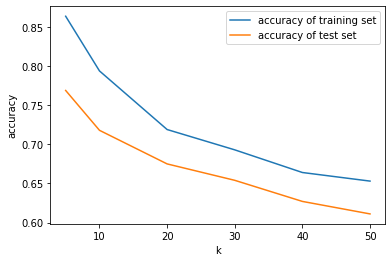

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k,ACCTrain,label="accuracy of training set")
plt.plot(k,ACCTest,label="accuracy of test set")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###Solution:The two curves of correct classifications percentage on train (blue) and test (orange) are shown as figure above. It is observbed that the accuracy is decreasing from 5, considered with sample rate, then The best range of k is 0<k<10. In the next step all k below to 10 will be tested to find the best performance k###

##2.3 Repeat the preceding exploration for a few more values of k within the range [a,b]. Conclude by selecting a "best" value k* for the integer k. Compute a 90% confidence interval for testperfk when k=k*.##

####Solution:####
Run 2.3 solution code first.

In [ ]:
iterations=30

In [ ]:
import sklearn.metrics as metrics
ACCTrain_intp=[0]*(iterations)
ACCTest_intp=[0]*(iterations)
for a in range (1,iterations+1):
  model=KNeighborsClassifier(n_neighbors=a)
  model.fit(x_train,y_train)
  ACCTrain_intp[a-1]=np.around(metrics.accuracy_score(y_train,model.predict(x_train)),decimals=3)
  ACCTest_intp[a-1]=np.around(metrics.accuracy_score(y_test,model.predict(x_test)),decimals=3)
  print('When k=',a,'ACCTrain_intp=',ACCTrain_intp[a-1],'ACCTest_intp=',ACCTest_intp[a-1])

When k= 1 ACCTrain_intp= 1.0 ACCTest_intp= 0.876
When k= 2 ACCTrain_intp= 0.936 ACCTest_intp= 0.823
When k= 3 ACCTrain_intp= 0.914 ACCTest_intp= 0.812
When k= 4 ACCTrain_intp= 0.884 ACCTest_intp= 0.781
When k= 5 ACCTrain_intp= 0.864 ACCTest_intp= 0.769
When k= 6 ACCTrain_intp= 0.841 ACCTest_intp= 0.752
When k= 7 ACCTrain_intp= 0.835 ACCTest_intp= 0.742
When k= 8 ACCTrain_intp= 0.823 ACCTest_intp= 0.729
When k= 9 ACCTrain_intp= 0.807 ACCTest_intp= 0.721
When k= 10 ACCTrain_intp= 0.794 ACCTest_intp= 0.718
When k= 11 ACCTrain_intp= 0.789 ACCTest_intp= 0.718
When k= 12 ACCTrain_intp= 0.779 ACCTest_intp= 0.714
When k= 13 ACCTrain_intp= 0.772 ACCTest_intp= 0.703
When k= 14 ACCTrain_intp= 0.76 ACCTest_intp= 0.699
When k= 15 ACCTrain_intp= 0.752 ACCTest_intp= 0.696
When k= 16 ACCTrain_intp= 0.745 ACCTest_intp= 0.688
When k= 17 ACCTrain_intp= 0.739 ACCTest_intp= 0.699
When k= 18 ACCTrain_intp= 0.731 ACCTest_intp= 0.682
When k= 19 ACCTrain_intp= 0.722 ACCTest_intp= 0.681
When k= 20 ACCTrain_intp

In [ ]:
np.array(ACCTrain_intp)

array([1.   , 0.936, 0.914, 0.884, 0.864, 0.841, 0.835, 0.823, 0.807,
       0.794, 0.789, 0.779, 0.772, 0.76 , 0.752, 0.745, 0.739, 0.731,
       0.722, 0.719, 0.715, 0.708, 0.7  , 0.697, 0.697, 0.694, 0.698,
       0.697, 0.696, 0.693])

In [ ]:
np.array(ACCTest_intp)

array([0.876, 0.823, 0.812, 0.781, 0.769, 0.752, 0.742, 0.729, 0.721,
       0.718, 0.718, 0.714, 0.703, 0.699, 0.696, 0.688, 0.699, 0.682,
       0.681, 0.675, 0.668, 0.669, 0.674, 0.674, 0.675, 0.666, 0.67 ,
       0.665, 0.665, 0.654])

In [ ]:
bestF=max(ACCTest_intp)
bestK= ACCTest_intp.index(max(ACCTest_intp))+1
print('the best performance is when k=',bestK,'the accuracy is of test dataset is', bestF)

the best performance is when k= 1 the accuracy is of test dataset is 0.876


In [ ]:
std_bestk=np.std(ACCTest_intp)
ci=np.around(1.65*std_bestk,decimals=3)
ci_range=[-ci,ci]
print('the standard deviations is',np.around(std_bestk,decimals=3),'and the 90% confidence interval range is',ci_range)

the standard deviations is 0.053 and the 90% confidence interval range is [-0.087, 0.087]


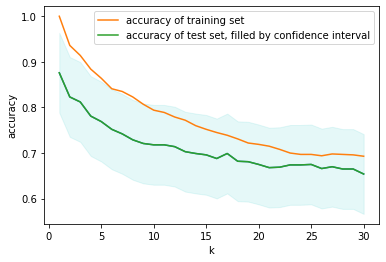

In [ ]:
n=list(range(1,iterations+1))
fig,ax=plt.subplots()
x=n
std_bestk=np.std(ACCTest_intp)
ci=1.65*std_bestk
y=ACCTest_intp
ax.plot(x,y)
ax.fill_between(x,(y-ci),(y+ci),color='c',alpha=.1)
plt.plot(x,ACCTrain_intp,label="accuracy of training set")
plt.plot(x,ACCTest_intp,label="accuracy of test set, filled by confidence interval")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()

After choose k=5,7,9,10 etc, the performance when k=5 is still the best of them. Then keep digging into each integer value of 0<k<10, and plot them out. From the figure above it can be observed that, the performance (accuracy) is decreasing from k=1, then the best prefer k is 1, the corresponding test data accuracy is 0.876

##2.4 Using the "best" k= k*, compute and interpret the 4x4 confusion matrix testconf on the TEST set ; make sure to compute the coefficients testconf(i,j) in row i of this matrix as percentages within class CLi;compute and interpret confidence intervals for the 4 diagonal terms of the matrix testconf . Compare the performances among the 4 classes##

####solution: Since the best performance is ocurred at k=1, we put k=1 to generate confusion matrix.

In [ ]:
#Apply KNN for k=1
%%timeit
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train,y_train)
y_train_pred1=model1.predict(x_train)
y_test_pred1=model1.predict(x_test)
## k=1 Model Accuracy
AccTest1=np.around(metrics.accuracy_score(y_test, y_test_pred1),decimals=3)
print('when k=1, the test data accuracy is',AccTest1)

when k=1, the test data accuracy is 0.876
when k=1, the test data accuracy is 0.876
when k=1, the test data accuracy is 0.876
when k=1, the test data accuracy is 0.876
when k=1, the test data accuracy is 0.876
when k=1, the test data accuracy is 0.876
1 loop, best of 5: 2.83 s per loop


In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x_test)
distances, indices = nbrs.kneighbors(x_test)

Text(0.5, 1.0, 'KNN(k=1) Confusion Matrix of Train Data')

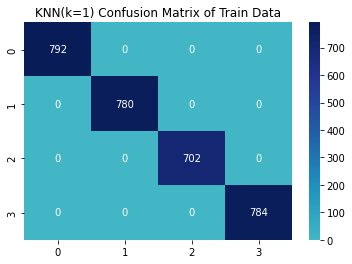

In [ ]:
from sklearn.metrics import confusion_matrix
cm1_train=confusion_matrix(y_train,y_train_pred1)
import seaborn as sns
sns.heatmap(cm1_train,annot = True, center= 1,fmt='d',cmap= 
            'YlGnBu').set_title('KNN(k=1) Confusion Matrix of Train Data')

In [ ]:
counts_train=(len(x1_train),len(x2_train),len(x3_train),len(x4_train))
counts_test=((len(x1_test),len(x2_test),len(x3_test),len(x4_test)))
cm1_train_ratio=cm1_train/counts_train
cm1_train_ratio

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Text(0.5, 1.0, 'KNN(k=1) Confusion Matrix of Train Data Accuracy')

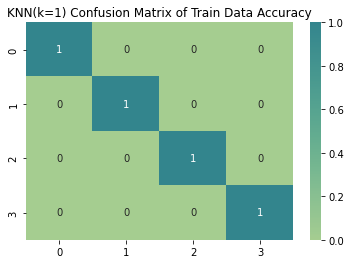

In [ ]:
sns.heatmap(cm1_train_ratio,annot = True, center= 1,cmap='crest').set_title('KNN(k=1) Confusion Matrix of Train Data Accuracy')

Text(0.5, 1.0, 'KNN(k=1) Confusion Matrix of Test Data')

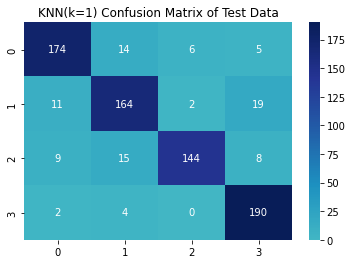

In [ ]:
from sklearn.metrics import confusion_matrix
cm1_test=confusion_matrix(y_test,y_test_pred1)
import seaborn as sns
sns.heatmap(cm1_test,annot = True, center= 1,fmt='d',cmap= 
            'YlGnBu').set_title('KNN(k=1) Confusion Matrix of Test Data')

Text(0.5, 1.0, 'KNN(k=1) Confusion Matrix of Test Data Accuracy')

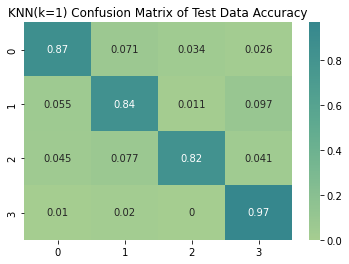

In [ ]:
cm1_test_ratio=cm1_test/counts_test
sns.heatmap(cm1_test_ratio,annot = True, center= 1,cmap='crest').set_title(
    'KNN(k=1) Confusion Matrix of Test Data Accuracy')

In [ ]:
print(len(x1_test),len(x2_test),len(x3_test),len(x4_test))

199 196 176 196


Interpretation of confusion matrix: In the train data set, the correct numbers of cases are: 174 of 199 for CL1, 164 of 196 for CL2, 144 of 176 for CL3, 190 of 196 for CL4; Therefore, the accuracy of CL1 is 174/199=87.4%, accuracy of CL2 is 164/196=83.7%; accuracy of CL3 is 144/176=81.2%, accuracy of CL4 is 190/196=96.9%, and the total accuracy is (174+164+144+190)/(199+196+176+196)=87.6%.

Say false negative is type II error and false positive is type I error. By the confusion matrix, for CL1 there are 14+6+5=25 type II errors (failure to recognize CL1) and 11+9+2=22 type I errors (wrongly recognize other classes to CL1); for CL2 there are 11+2+19=32 type II errors and 14+15+4=33 type I errors; for CL3 there are 9+15+8=32 type II errors and 6+2+0=8 type I errors; and 2+4=6 type II errors and 5+19+8=32 type I errors for CL4. 

##2.5 Generate the list ERR21 , of class 2 cases which (in question 2.4 ) were misclassified as class 1 cases Generate similarly the lists ERR23, ERR24 of class 2 cases misclassified as class 3 or class4 these lists will be graphically displayed in Part3.##
pick 3 cases of misclassification (one in each list) and try to explain why they were misclassified , for instance by computing their closest neighbours explicitly

In [ ]:
y_test.shape

(767,)

In [ ]:
y_test[700]

4.0

In [ ]:
#list the ERR21, ERR23 and ERR24 out
L21=[]
L23=[]
L24=[]
for i in range (767):
  if y_test[i]==2 and y_test_pred1[i] ==1:
    L21.append(i)
  if y_test[i]==2 and y_test_pred1[i] ==3:
    L23.append(i)
  if y_test[i]==2 and y_test_pred1[i]==4:
    L24.append(i)

In [ ]:
print(L21)

[203, 208, 259, 301, 315, 322, 326, 334, 349, 363, 393]


In [ ]:
x_test[203]

In [ ]:
len(x_train)

3058

In [ ]:
x_train[3057]

In [ ]:
y_train[331]

1.0

In [ ]:
print(L23)

[200, 344]


In [ ]:
print(L24)

[206, 213, 220, 223, 235, 255, 256, 278, 281, 286, 335, 351, 367, 373, 376, 378, 384, 385, 389]


By confusion matrix, it can be observed that
ERR12=8; ERR13=2; ERR14=9
ERR21=30; ERR23=1; ERR24=5
ERR31=32; ERR32=13; ERR34=5
ERR41=16; ERR42=20; ERR43=2
For example, ERR12=8, which means there are 8 class 1 (df_bodoni) cases were misclassified to class 2(eras), for those class I cases, the closest neigbours are belong to class 2.

Select each sample from ERR21, ERR23 and ERR24, and calculate the nearest distance, and find out the projected data in x_train and its class.
Here we pick 203 in L21, 200 in L23 and 206 in L24.

For x_test[203]

In [ ]:
#Calculate the distance between vector x_test[203] and x_train 
from scipy.spatial import distance
dst_203=[0]*len(x_train)
for i in range(len(x_train)):
  dst_203[i]= distance.euclidean(x_test[203], x_train[i])

In [ ]:
# find the min of the distance
min(dst_203)

14.640442000030736

In [ ]:
# the min distance return to the location of x_train
min_index_203 = dst_203.index(min(dst_203)) 
min_index_203

331

In [ ]:
#then the x_train[331] is belong to class 1
y_train[min_index_203] 

1.0

For 200 in L23

In [ ]:
#Calculate the distance between vector x_test[203] and x_train 
from scipy.spatial import distance
dst_200=[0]*len(x_train)
for i in range(len(x_train)):
  dst_200[i]= distance.euclidean(x_test[200], x_train[i])

In [ ]:
# find the min of the distance
min(dst_200)

10.361580202067179

In [ ]:
# the min distance return to the location of x_train
min_index_200 = dst_200.index(min(dst_200)) 
min_index_200

2188

In [ ]:
#then the x_train[2188] is belong to class 3
y_train[min_index_200] 

3.0

In [ ]:
For 206 in L24

In [ ]:
#Calculate the distance between vector x_test[206] and x_train 
from scipy.spatial import distance
dst_206=[0]*len(x_train)
for i in range(len(x_train)):
  dst_206[i]= distance.euclidean(x_test[206], x_train[i])

In [ ]:
# find the min of the distance
min(dst_206)

10.030757514049727

In [ ]:
# the min distance return to the location of x_train
min_index_206 = dst_206.index(min(dst_206)) 
min_index_206

2425

In [ ]:
#then the x_train[2425] is belong to class 4
y_train[min_index_206] 

4.0

Here the explicitly distance of x_test[203,200,206] to x_train has been calculated, and the min of the disance are: [14.6404, 10.3616, 10.0308], the distance pointed to x_train[331,2188,2425], check y_train and find that they belong to class 1, 3 and 4. That's the reason they have been misclassified, by KNN (k=1). 

**Part 3**

3.1 compute the 400 eigenvalues L1 .> L2 > ... > L400 and the 400 column eigenvectors W1...W400 of
the correlation matrix CORR;
denote W the 400x400 matrix with columns W1... W400; display the matrix W in an excel or csv
document attached to your emailed report
Display the graph of Lm versus m

In [ ]:
#### PCA analysis
from sklearn import preprocessing

In [ ]:
## standarize the dataset beofre PCA analysis
scaler=preprocessing.StandardScaler().fit(DATA)
DATA_scaled1=scaler.transform(DATA)
DATA_scaled=pd.DataFrame(DATA_scaled1)
CORR=DATA_scaled.corr()
DATA_scaled.shape

(3825, 400)

In [ ]:
## Eigenvalues Eigen vector of CORR
from numpy import linalg as LA
l,w=LA.eig(CORR) # l is eigenvalues, w is eigen vector

In [ ]:
print(w)

[[ 0.02514956 -0.04249915  0.09660487 ... -0.01837834 -0.0025366
   0.00068306]
 [ 0.02609725 -0.04252086  0.09947494 ...  0.07079948  0.02864257
   0.00270158]
 [ 0.03092522 -0.03612079  0.09151322 ... -0.04373474 -0.04097353
  -0.00130633]
 ...
 [ 0.02753708 -0.02682216  0.04416674 ... -0.01704432  0.01517336
   0.01059914]
 [ 0.0231047  -0.03139924  0.05644592 ...  0.02182158  0.00218493
  -0.01664625]
 [ 0.02312953 -0.03379886  0.06288974 ... -0.02012451 -0.0097602
   0.00563995]]


In [ ]:
w_df=pd.DataFrame(w)
print(w_df)
w_df.to_excel(r'/content/drive/MyDrive/KNN_font/w.xlsx')



          0         1         2    ...       397       398       399
0    0.025150 -0.042499  0.096605  ... -0.018378 -0.002537  0.000683
1    0.026097 -0.042521  0.099475  ...  0.070799  0.028643  0.002702
2    0.030925 -0.036121  0.091513  ... -0.043735 -0.040974 -0.001306
3    0.036747 -0.028695  0.081969  ...  0.001802  0.034796 -0.013809
4    0.040954 -0.025756  0.074742  ...  0.002174 -0.056581  0.013377
..        ...       ...       ...  ...       ...       ...       ...
395  0.040555 -0.020283  0.026669  ...  0.024051  0.017735 -0.006394
396  0.031938 -0.020889  0.033934  ... -0.023464 -0.045370 -0.006276
397  0.027537 -0.026822  0.044167  ... -0.017044  0.015173  0.010599
398  0.023105 -0.031399  0.056446  ...  0.021822  0.002185 -0.016646
399  0.023130 -0.033799  0.062890  ... -0.020125 -0.009760  0.005640

[400 rows x 400 columns]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(l.shape)

(400,)


In [ ]:
print(l)

[7.44314042e+01 4.89168712e+01 2.38946799e+01 1.65117091e+01
 1.51886863e+01 1.39342802e+01 1.26748914e+01 9.33479083e+00
 8.92601030e+00 7.70322641e+00 7.23061966e+00 6.98817118e+00
 6.67185523e+00 6.22776172e+00 5.96924394e+00 5.23516240e+00
 4.84889685e+00 4.55812902e+00 4.28452789e+00 3.85731361e+00
 3.70724409e+00 3.53092672e+00 3.37649560e+00 3.18477967e+00
 3.11065000e+00 3.00123082e+00 2.79588913e+00 2.66817245e+00
 2.59834269e+00 2.34970747e+00 2.32183491e+00 2.23655612e+00
 2.00005373e+00 1.95686341e+00 1.85905708e+00 1.81875969e+00
 1.72574373e+00 1.67563299e+00 1.56854944e+00 1.52164683e+00
 1.44908600e+00 1.43924005e+00 1.36276162e+00 1.32160790e+00
 1.25088957e+00 1.22312738e+00 1.18753145e+00 1.17542289e+00
 1.11267894e+00 1.07129369e+00 1.04734208e+00 1.02471680e+00
 9.99107486e-01 9.95901908e-01 9.26716695e-01 8.86914568e-01
 8.64208379e-01 8.42192063e-01 8.05306666e-01 7.80353232e-01
 7.62133086e-01 7.44290789e-01 7.20565674e-01 7.14345460e-01
 7.04383038e-01 6.931639

Text(0, 0.5, 'eigenvalue l')

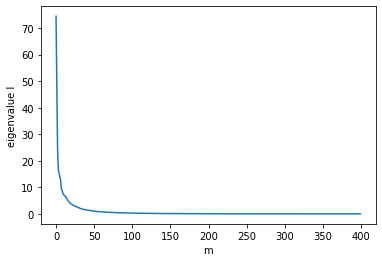

In [ ]:
plt.plot(l)
plt.xlabel('m')
plt.ylabel('eigenvalue l')


3.2 The first m eigenvectors W1... Wm provide a Percentage of Explained Variance PEV(m)
Compute PEV(m) by the formula PEV(m) = ( L1 + L2 + ... +Lm )/400
Display the graph PEV(m) versus m
Compute the smallest integer "r" such that PEV(r) >= 90%

In [ ]:
L=np.sort(l)[::-1] # sort the eigenvalues in decreasing order
idx=np.argsort(-l)
L

array([7.44314042e+01, 4.89168712e+01, 2.38946799e+01, 1.65117091e+01,
       1.51886863e+01, 1.39342802e+01, 1.26748914e+01, 9.33479083e+00,
       8.92601030e+00, 7.70322641e+00, 7.23061966e+00, 6.98817118e+00,
       6.67185523e+00, 6.22776172e+00, 5.96924394e+00, 5.23516240e+00,
       4.84889685e+00, 4.55812902e+00, 4.28452789e+00, 3.85731361e+00,
       3.70724409e+00, 3.53092672e+00, 3.37649560e+00, 3.18477967e+00,
       3.11065000e+00, 3.00123082e+00, 2.79588913e+00, 2.66817245e+00,
       2.59834269e+00, 2.34970747e+00, 2.32183491e+00, 2.23655612e+00,
       2.00005373e+00, 1.95686341e+00, 1.85905708e+00, 1.81875969e+00,
       1.72574373e+00, 1.67563299e+00, 1.56854944e+00, 1.52164683e+00,
       1.44908600e+00, 1.43924005e+00, 1.36276162e+00, 1.32160790e+00,
       1.25088957e+00, 1.22312738e+00, 1.18753145e+00, 1.17542289e+00,
       1.11267894e+00, 1.07129369e+00, 1.04734208e+00, 1.02471680e+00,
       9.99107486e-01, 9.95901908e-01, 9.26716695e-01, 8.86914568e-01,
      

In [ ]:
## calculate the PEV(m)
sum=0
pev=[]
for m in L:
  sum+=m
  pev.append(sum/400)
type(pev)
print(pev)

[0.18607851044304055, 0.308370688555263, 0.3681073882418371, 0.40938666110401206, 0.4473583767565873, 0.4821940773423388, 0.5138813057418219, 0.5372182828049392, 0.559533308557965, 0.5787913745752752, 0.5968679237346136, 0.6143383516769854, 0.6310179897554361, 0.646587394055066, 0.6615105039001287, 0.6745984098883082, 0.6867206520191231, 0.698115974572638, 0.7088272942912546, 0.7184705783083508, 0.7277386885286257, 0.7365660053285238, 0.7450072443216436, 0.7529691934896577, 0.7607458185004974, 0.7682488955618623, 0.7752386183859721, 0.7819090495191028, 0.7884049062327905, 0.7942791749156731, 0.800083762201772, 0.8056751525130942, 0.8106752868429328, 0.8155674453706581, 0.8202150880827355, 0.8247619873153724, 0.8290763466483065, 0.8332654291242967, 0.8371868027320999, 0.8409909198117534, 0.8446136348130824, 0.8482117349480415, 0.8516186390074939, 0.8549226587529816, 0.858049882689122, 0.8611077011322394, 0.8640765297549593, 0.8670150869895096, 0.8697967843354104, 0.8724750185678173, 0.8

Text(0, 0.5, 'PEV(m)')

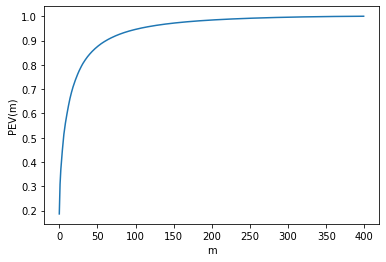

In [ ]:
df_pev=pd.DataFrame(pev)
plt.plot(df_pev)
plt.xlabel('m')
plt.ylabel('PEV(m)')

In [ ]:
## find the smallest r such that PEV(r)>=90%
for r in range(400):
  if L[0:r].sum() > 0.9*400:
    print(r)
    break

63


3.3 Each case #n will be represented by its first r principal components [ PC1(n) , ..., PCr(n)]
These numbers are given by matrix products of the form [line vector]* [column vector]
PC1(n) = Sn *W1, PC2(n) = Sn*W2 , ... , PCr(n) = Sn*Wr
Case #n will now be described by the row vector Zn = [PC1(n) ....PCr(n)] of its first "r" principal
components
the row vector Zn has dimension "r" and is given by Zn = Sn * W
Denote ZDATA the Nx400 matrix stacking up the N row vectors Z1; Z2; ... ZN
Compute the matrix ZDATA by the matrix product ZDATA = SDATA*W

In [ ]:
W=w[:,idx[0:63]] # find eigenvectors that corresponding to the largest r eigenvalues
W.shape

(400, 63)

In [ ]:
Z=np.matmul(DATA_scaled1, W) # transform dataset
ZDATA=pd.DataFrame(Z)
ZDATA.head(5)
ZDATA.shape

(3825, 63)

In [ ]:
df_Z_combine=ZDATA
df_Z_combine['TRUC']=TRUC
ZDATA.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,TRUC
0,10.943515,0.680722,-11.488911,-8.212148,0.832010,-1.691098,4.609610,0.039674,-1.482421,-0.136508,0.282818,-2.619564,0.549113,1.180257,-0.844702,1.746683,-0.851482,-1.312686,-1.019171,3.183344,1.600740,-0.251947,-2.417740,-3.232217,-0.440476,-0.723116,1.217556,-3.446247,0.829831,2.229203,-0.977846,1.348149,0.118314,-1.291969,-1.512755,0.786054,-0.315064,-0.340291,-0.146282,-0.340761,0.891224,0.187159,0.751044,-1.379624,0.008610,-1.621260,0.144922,-0.053567,-1.680199,-1.232671,-0.178858,-0.304611,-0.138759,-1.285064,-0.528023,0.769135,-0.488762,-0.634398,-2.144905,-1.174291,0.166916,-0.989223,0.100886,1.0
1,8.096640,0.663474,-11.907310,-7.662379,0.866832,-2.685932,1.556221,-1.280890,0.851212,-3.597584,0.908879,-2.198719,-0.544490,0.756424,-0.448326,-0.205711,-2.063776,-0.281766,-1.606952,3.133083,-0.207759,1.350630,-3.085962,-2.412282,-0.909141,-1.747126,0.559129,-0.914569,2.090242,1.384300,-1.319237,0.542809,0.772361,-0.650029,-1.801065,0.894958,0.610202,0.093921,-0.260799,-0.971948,-0.263223,-0.845068,0.984170,-2.298875,-0.288260,-1.248204,0.054037,0.122242,-1.609439,-2.073119,0.246315,-1.237468,0.003820,-0.098733,-1.440829,0.755243,1.768898,-1.483863,-2.444404,-2.004321,0.722954,-0.942243,-0.158939,1.0
2,-4.809154,3.191056,-5.580065,2.162277,-0.135000,6.224423,-1.710066,-0.412147,-0.705539,0.841243,-8.308508,1.342383,-0.929461,3.051542,3.102527,-0.189090,1.032871,0.019768,1.715497,1.839866,3.134748,1.752752,3.721652,-1.462761,0.371278,-0.984565,-1.394009,-0.788249,-0.799604,0.871769,1.769222,2.046764,-0.973063,1.868693,-0.958637,1.807606,3.597193,1.830904,-0.849880,1.757120,-1.256690,-0.520030,-0.765874,-1.460780,0.156054,-1.292710,-1.166100,0.058666,-0.052967,0.532750,0.713398,0.024570,0.278020,1.545846,0.169169,-0.551899,0.275746,0.019797,0.119999,-0.043028,-1.958173,0.688272,1.854138,1.0
3,-5.830823,0.586098,2.434454,-0.905679,1.084209,-3.240102,-0.298733,1.106235,-3.907598,-1.352833,-0.907318,-0.357038,-0.739153,6.563935,-1.901225,-2.669377,1.966403,-0.033944,4.516546,2.725006,-1.078344,1.241554,-0.803995,2.666666,3.325454,0.710791,0.305054,-0.281398,-3.759307,-1.624570,1.225150,-0.912860,4.023778,-2.910865,0.093123,0.743516,0.415617,1.334193,1.117158,-2.656578,-2.976436,-1.033622,3.089240,-2.746988,0.904266,2.559025,2.536045,0.236271,-0.784310,-0.911368,-0.096906,0.205305,0.429792,0.450236,0.112015,0.430902,0.379960,1.756987,-2.816309,1.206629,0.224827,-0.302008,-1.506018,1.0
4,-5.961022,0.604928,1.705239,-0.764858,-0.386101,-3.103016,-1.010493,-0.490158,0.615431,-1.276050,-0.520766,-0.949813,0.548476,4.662291,-3.626671,5.625154,1.327071,0.034101,2.201699,4.193113,2.151872,-1.405602,1.081443,-3.227517,0.941498,3.796236,0.792220,-0.001948,4.518350,-2.753819,-0.169964,-2.065476,1.449987,-0.294707,4.030412,0.801231,-0.916516,1.975124,0.818262,-2.549275,-1.439110,-2.517072,0.199995,-2.382175,0.901975,0.330529,-0.227813,1.188973,-0.162118,0.740001,-0.358973,0.993736,0.459205,0.615071,-0.348207,-2.060569,0.877487,-0.159140,-1.839590,-1.820811,2.536119,-0.431602,1.325537,1.0


3.4 Apply kNN classification with the same k=k* as in 2.4, and with the same TRAIN and TEST sets,
but with each case #n described by the "r" new features Zn = [PC1(n) ....PCr(n)]
Note : this means that the matrix SDATA is replaced by ZDATA
Compute the new performance newtestperf on the TEST set
Compare performances as well as computing times between 2.4 and 3.4

In [ ]:
## split the training and test set
z_y=ZDATA['TRUC']
z_x=ZDATA.drop('TRUC',axis=1)
z_x_train,z_x_test,z_y_train,z_y_test=train_test_split(z_x,z_y,test_size=0.2,random_state=5)

In [ ]:
##KNN using the transformed data, k=1
from sklearn.neighbors import KNeighborsClassifier
model_z=KNeighborsClassifier(n_neighbors=1)

In [ ]:
model_z.fit(z_x_train,z_y_train) #training the model with training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
## predict output
%%timeit
from sklearn import metrics
y_train_pred_z=model_z.predict(z_x_train)
y_test_pred_z=model_z.predict(z_x_test)
## model accuracy
print("Accuracy of training set:",metrics.accuracy_score(z_y_train, y_train_pred_z))
print("Accuracy of test set:",metrics.accuracy_score(z_y_test, y_test_pred_z))

Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
Accuracy of training set: 0.9830065359477124
Accuracy of test set: 0.8588235294117647
1 loop, best of 5: 253 ms per loop


In [ ]:
from sklearn.metrics import confusion_matrix
cm_z=confusion_matrix(z_y_test,y_test_pred_z)
cm_z

array([[158,  21,   8,  10],
       [ 14, 146,   7,  13],
       [ 11,  13, 153,   3],
       [  6,   2,   0, 200]])

Text(0.5, 1.0, 'KNN(n=1) Confusion Matrix of ZDATA')

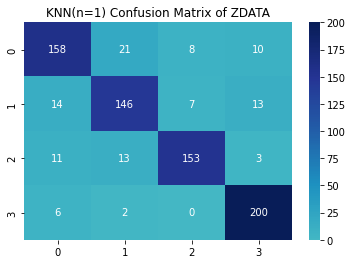

In [ ]:
import seaborn as sns
sns.heatmap(cm_z,annot = True, center= 2,fmt='d',cmap= 
            'YlGnBu').set_title('KNN(n=1) Confusion Matrix of ZDATA')

3.5 Pick color1 color2 color3 color4, one color per class CL1 CL2 CL3 CL4
Represent each Case #n by its first 2 principal components [Z1(n),Z2(n)]
Case #n can be (very approximately) represented by the planar point Vn = [Z1(n), Z2(n)]
Display on the same planar graph the scatter plot of CL2 cases (in color2) and CL4 cases in color4
evaluate visually if these planar projections of CL2 and CL4 look easily separable or not
Implement similar displays for CL2, CL3 and CL2,CL1

In [ ]:
l2=[]
l4=[]
l3=[]
l1=[]
for i in range(3060):
  if z_y_train.iloc[i]==2:
    l2.append(i)
  if z_y_train.iloc[i]==4:
    l4.append(i)
  if z_y_train.iloc[i]==3:
    l3.append(i)
  if z_y_train.iloc[i]==1:
    l1.append(i)

Text(0.5, 1.0, 'CL2 VS CL4')

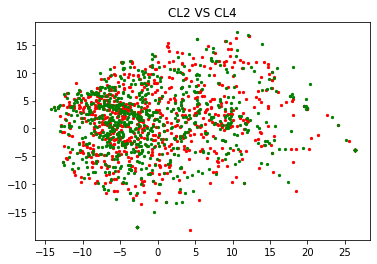

In [ ]:
## plot the CL2 cases(red) and CL4 cases(green) using the data set ZDATA
CL2DATA=ZDATA.iloc[l2]
CL4DATA=ZDATA.iloc[l4]
plt.scatter(CL2DATA[0],CL2DATA[1],s=5,color='red')
plt.scatter(CL4DATA[0],CL4DATA[1],s=5,color='green')
plt.title('CL2 VS CL4')

Text(0.5, 1.0, 'CL2 VS CL3')

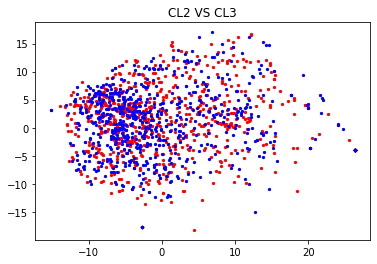

In [ ]:
## plot the CL2 cases(red) and CL3 cases(blue) using the data set ZDATA
CL2DATA=ZDATA.iloc[l2]
CL3DATA=ZDATA.iloc[l3]
plt.scatter(CL2DATA[0],CL2DATA[1],s=5,color='red')
plt.scatter(CL3DATA[0],CL3DATA[1],s=5,color='blue')
plt.title('CL2 VS CL3')

Text(0.5, 1.0, 'CL2 VS CL1')

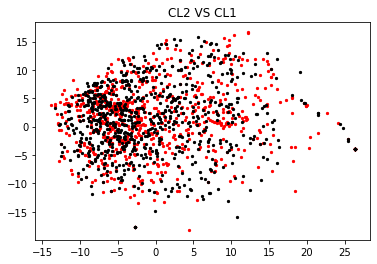

In [ ]:
## plot the CL2 cases(red) and CL1 cases(black) using the data set ZDATA
CL2DATA=ZDATA.iloc[l2]
CL1DATA=ZDATA.iloc[l1]
plt.scatter(CL2DATA[0],CL2DATA[1],s=5,color='red')
plt.scatter(CL1DATA[0],CL1DATA[1],s=5,color='black')
plt.title('CL2 VS CL1')

3.6 On a new graph display as above the planar projection of CL2 in color2
add the display in color1 of all the misclassifed points listed in the list ERR21 ;
on the same figure add similar displays for the lists ERR23 and ERR24 in color3 and color 4
Interpret visually.

In [ ]:
z_y_test.shape

(765,)

In [ ]:
l21=[]
l23=[]
l24=[]
for i in range (765):
  if z_y_test.iloc[i]==2 and y_test_pred_z[i] ==1:
    l21.append(i)
  if z_y_test.iloc[i]==2 and y_test_pred_z[i] ==3:
    l23.append(i)
  if z_y_test.iloc[i]==2 and y_test_pred_z[i]==4:
    l24.append(i)

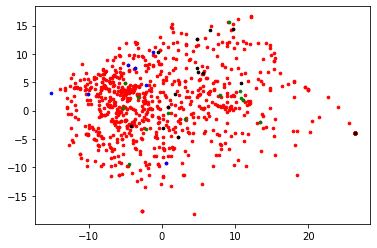

In [ ]:
ERR21_z=ZDATA.iloc[l21]
plt.scatter(CL2DATA[0],CL2DATA[1],s=7,color='red')
plt.scatter(ERR21_z[0],ERR21_z[1],s=7,color='black')
ERR23_z=ZDATA.iloc[l23]
plt.scatter(ERR23_z[0],ERR23_z[1],s=7,color='blue')
ERR24_z=ZDATA.iloc[l24]
plt.scatter(ERR24_z[0],ERR24_z[1],s=7,color='green')

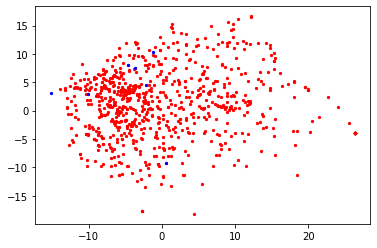

In [ ]:
ERR23_z=ZDATA.iloc[l23]
plt.scatter(CL2DATA[0],CL2DATA[1],s=5,color='red')
plt.scatter(ERR23_z[0],ERR23_z[1],s=5,color='blue')

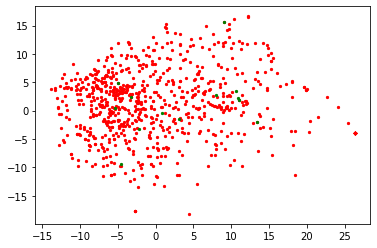

In [ ]:
ERR24_z=ZDATA.iloc[l24]
plt.scatter(CL2DATA[0],CL2DATA[1],s=5,color='red')
plt.scatter(ERR24_z[0],ERR24_z[1],s=5,color='green')